# Sign Language Classification


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

Dataset: https://www.kaggle.com/datamunge/sign-language-mnist


# Import Data


In [4]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')
#Datasets as numpy arrays
train_data = np.array(train, dtype = 'float32')
test_data = np.array(test, dtype='float32')

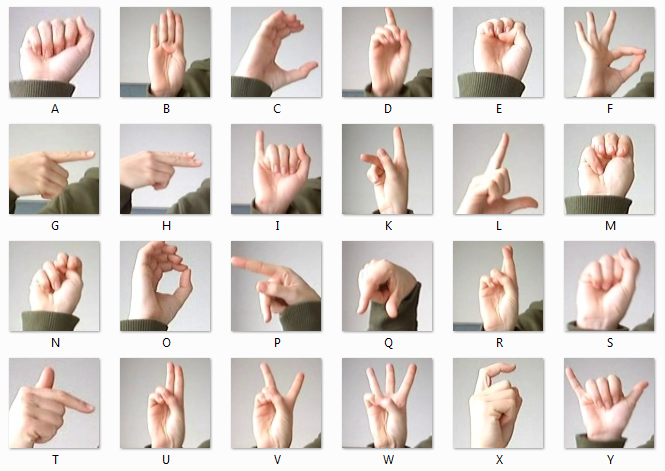

In [36]:
from PIL import Image

img = Image.open("amer_sign2.png")
pixels = img.load() # Load the pixels of the image into a matrix
img

# Define class labels for easy interpretation


In [5]:
#(Z is not included as it includes a wave motion, not captured using a single image)
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

# Sanity check - plot a few images and labels


Label for the image is:  K


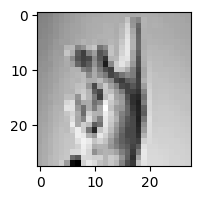

In [8]:
i = random.randint(1,train.shape[0])
fig1, ax1 = plt.subplots(figsize=(2,2))
plt.imshow(train_data[i,1:].reshape((28,28)), cmap='gray') 
print("Label for the image is: ", class_names[int(train_data[i,0])])

# Data distribution visualization


Text(0.5, 1.0, 'Label')

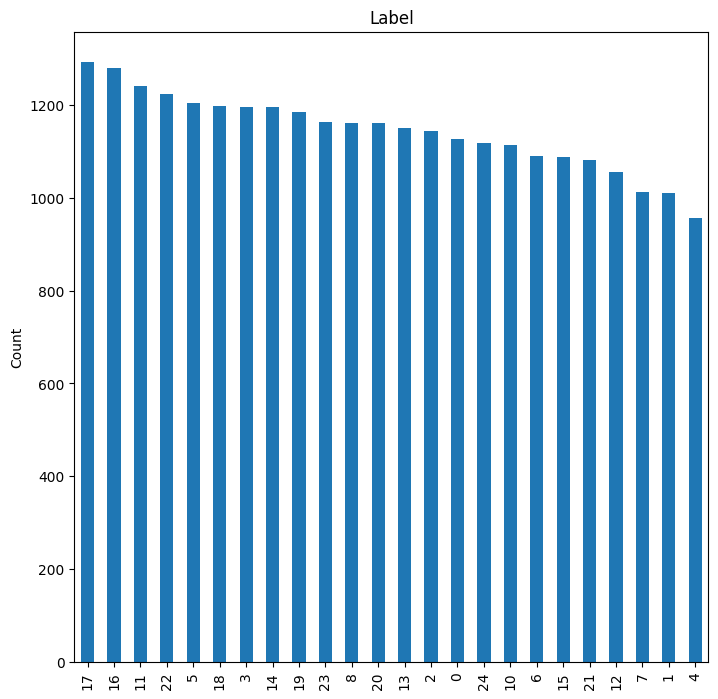

In [9]:

fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train['label'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Label')

# Normalize / scale values


In [10]:
X_train = train_data[:, 1:] /255.
X_test = test_data[:, 1:] /255.

#Convert y to categorical if planning on using categorical cross entropy
#No need to do this if using sparse categorical cross entropy
y_train = train_data[:, 0]
y_train_cat = to_categorical(y_train, num_classes=25)

y_test = test_data[:,0]
y_test_cat = to_categorical(y_test, num_classes=25)

#Reshape for the neural network
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

# Model


In [11]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(25, activation = 'softmax'))


#If your targets are one-hot encoded, use categorical_crossentropy. Examples of one-hot encodings:
# If your targets are integers, use sparse_categorical_crossentropy. 

#model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.summary()

#history = model.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test))
history = model.fit(X_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test_cat))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

# plot the training and validation accuracy and loss at each epoch


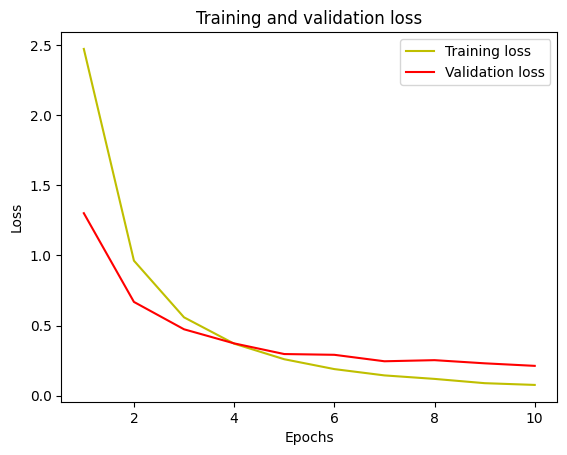

In [12]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

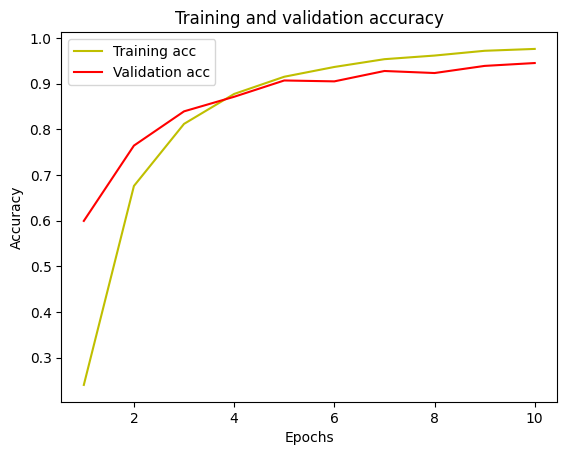

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
prediction = np.argmax(model.predict(X_test), axis=-1)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, prediction)
print('Accuracy Score = ', accuracy)

225/225 [==============================] - 2s 7ms/step
Accuracy Score =  0.9453430005577245


# test model


Predicted Label:  A
True Label:  A


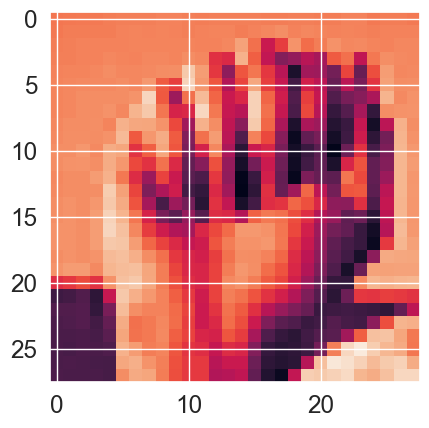

In [39]:
i = random.randint(1,len(prediction))
plt.imshow(X_test[i,:,:,0]) 
print("Predicted Label: ", class_names[int(prediction[i])])
print("True Label: ", class_names[int(y_test[i])])

<Axes: >

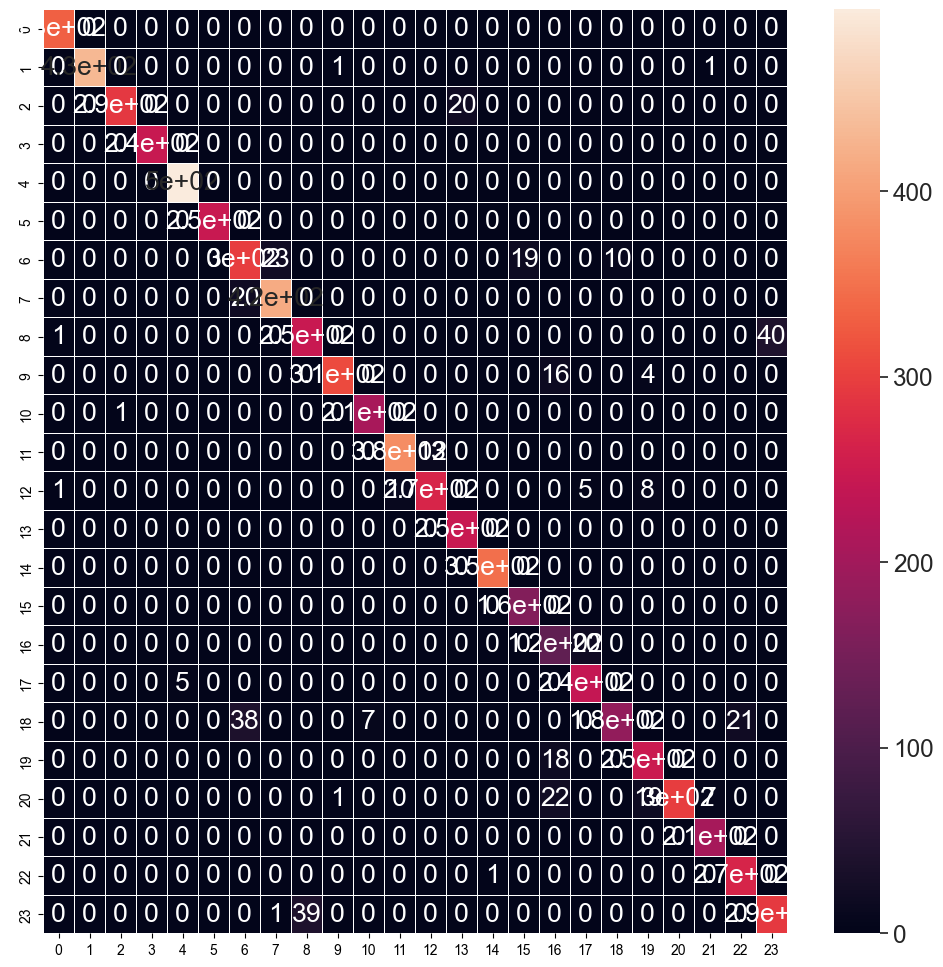

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(y_test, prediction)

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

ValueError: The number of FixedLocator locations (24), usually from a call to set_ticks, does not match the number of labels (25).

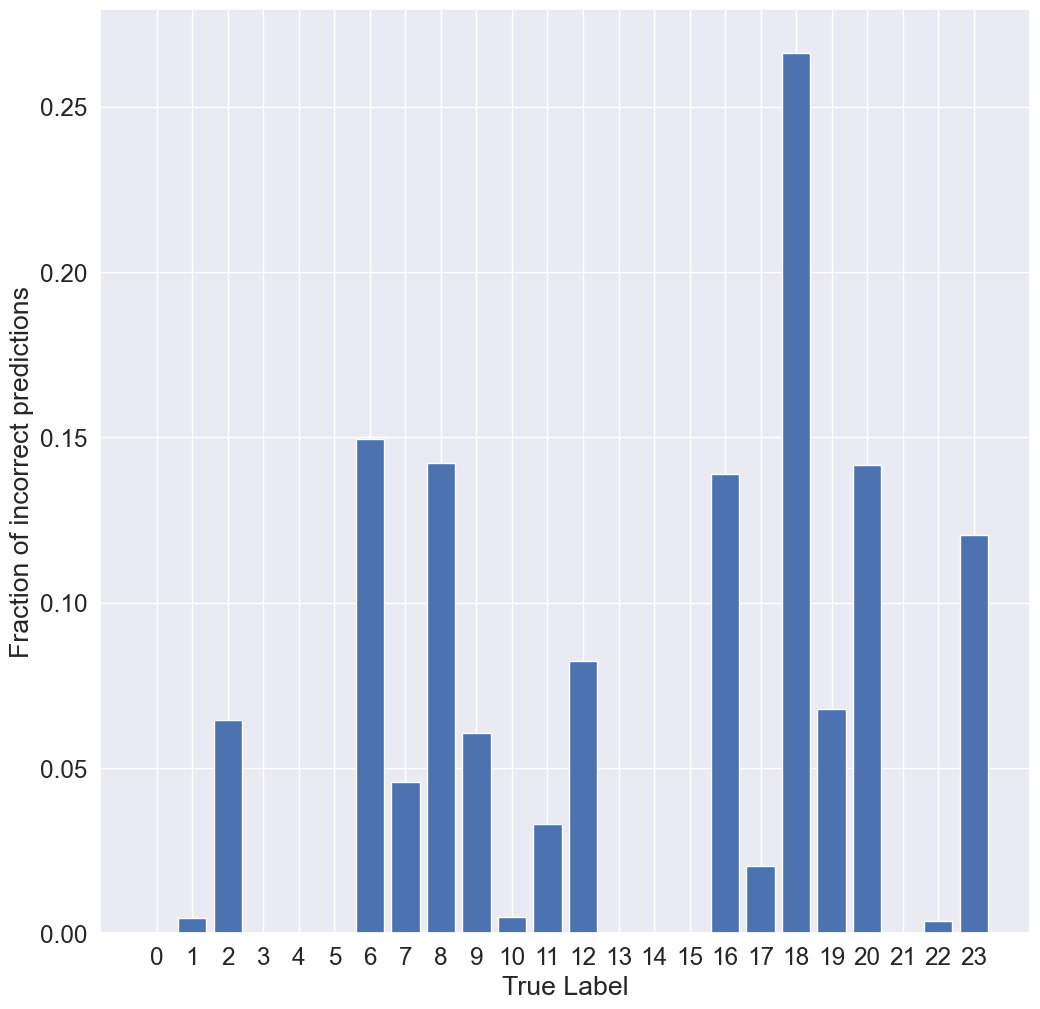

In [24]:
#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
fig, ax = plt.subplots(figsize=(12,12))
plt.bar(np.arange(24), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(24), class_names) 